## Detector model: Kiukas / Ruschhaupt / Schmidt / Werner

In [55]:
from sympy import *
#from sympy.physics.matrices import mdft
#from sympy.physics.quantum import TensorProduct
from sympy.functions.special.delta_functions import Heaviside
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot, plot3d_parametric_line
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['text.usetex'] = False

# https://matplotlib.org/gallery/mplot3d/lines3d.html?highlight=parametric
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


In [56]:
gamma = Symbol('gamma', real=True)
t = Symbol('t', real=True)
tprime = Symbol('t\'', real=True)
omega = Symbol('omega', real=True)

In [57]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [58]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [59]:
init_printing ()


In [60]:
H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [61]:
H.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [62]:
def K(_gamma):
    return H - I*D(_gamma)

In [63]:
K(gamma)

⎡0    1  ⎤
⎢        ⎥
⎢   -ⅈ⋅γ ⎥
⎢1  ─────⎥
⎣     2  ⎦

In [64]:
def B(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [65]:
def U():
    return lambda t: exp(-I*H*t)

In [66]:
def non_unitary_psi(_t):
    return B(2*sqrt(2))(_t) * Matrix([1,0])

In [67]:
def unitary_psi(_t):
    return U()(_t) * Matrix([1,0])

In [68]:
non_unitary_psi(t)

⎡          √2⋅t   √2⋅ⅈ⋅t             √2⋅t   √2⋅ⅈ⋅t⎤
⎢        - ──── - ──────           - ──── + ──────⎥
⎢           2       2                 2       2   ⎥
⎢√2⋅ⅈ⋅t⋅ℯ                  √2⋅ⅈ⋅t⋅ℯ               ⎥
⎢─────────────────────── - ───────────────────────⎥
⎢     ⎛√2⋅t   √2⋅ⅈ⋅t⎞           ⎛√2⋅t   √2⋅ⅈ⋅t⎞   ⎥
⎢   2⋅⎜──── + ──────⎟         2⋅⎜──── - ──────⎟   ⎥
⎢     ⎝ 2       2   ⎠           ⎝ 2       2   ⎠   ⎥
⎢                                                 ⎥
⎢          √2⋅t   √2⋅ⅈ⋅t         √2⋅t   √2⋅ⅈ⋅t    ⎥
⎢        - ──── - ──────       - ──── + ──────    ⎥
⎢           2       2             2       2       ⎥
⎢    √2⋅ℯ                  √2⋅ℯ                   ⎥
⎢    ─────────────────── - ───────────────────    ⎥
⎣             2                     2             ⎦

New period

In [69]:
2*pi / (sqrt(2)/2)

Components are either pure real or pure imaginary:

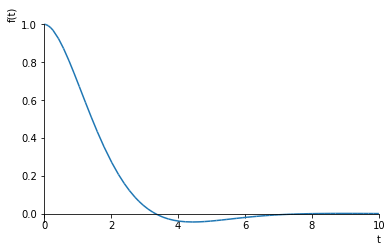

In [70]:
plot(re(non_unitary_psi(t)[0]), (t, 0, 10))

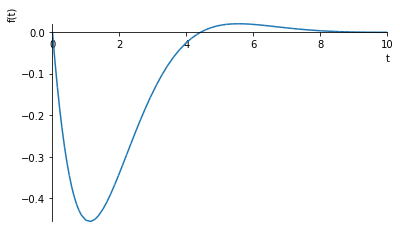

In [71]:
plot(im(non_unitary_psi(t)[1]), (t, 0, 10))

In [72]:
def lossy_norm(_t):
    psi = B(2*sqrt(2))(_t) * Matrix([1,0])
    return abs(psi[0])**2 + abs(psi[1])**2

In [73]:
non_unitary_psi_n = lambdify(t, non_unitary_psi(t), "numpy")

In [74]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [75]:
def non_unitary_psi_renorm_n(_t):
    return non_unitary_psi_n(_t) / np.sqrt(lossy_norm_n(_t))

In [76]:
T = np.linspace(1e-16, 10, 2000)

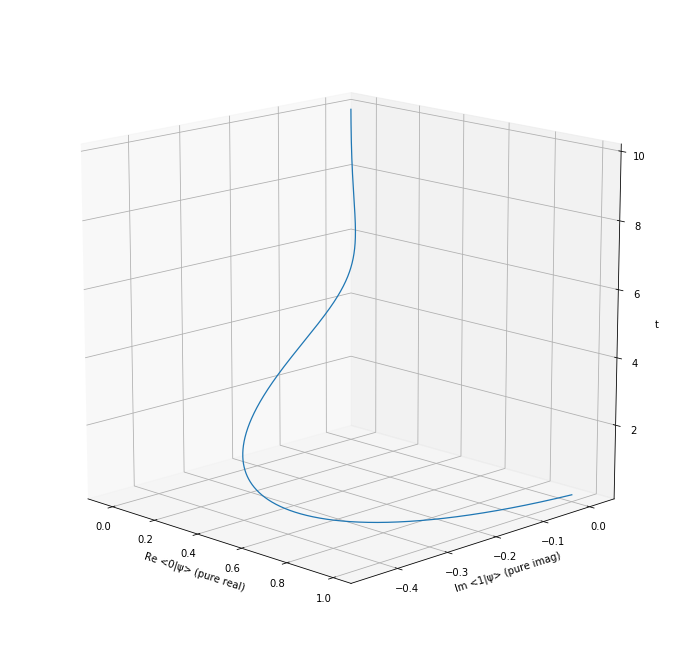

In [120]:
fig = plt.figure(figsize=(12,12))

ax = fig.gca(projection='3d')
ax.view_init(15,-45) # rotate 3d point of view
#ax2 = fig.gca(projection='3d')

ax.plot(
    np.real(non_unitary_psi_n(T)[0][0]), np.imag(non_unitary_psi_n(T)[1][0]), T,
    linewidth=1.25
)
#ax2.plot(
#    np.real(non_unitary_psi_n(T)[1][0]), np.imag(non_unitary_psi_n(T)[1][0]), T,
#    'r',
#    label='<\u03C8|1>',
#    linewidth=1
#)

#ax.legend()
#ax2.legend()

plt.xlabel('Re <0|\u03C8> (pure real)')
plt.ylabel('Im <1|\u03C8> (pure imag)')
ax.set_zlabel('t')

plt.show()

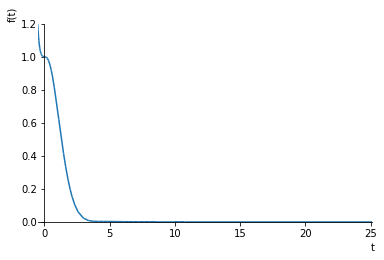

In [78]:
plot(lossy_norm(t),(t, -0.5, 8*pi))

In [79]:
def prob_0_detect(t):
    return abs(non_unitary_psi(t)[0]**2) / lossy_norm(t)

In [80]:
def prob_1_detect(t):
    return abs(non_unitary_psi(t)[1]**2) / lossy_norm(t)

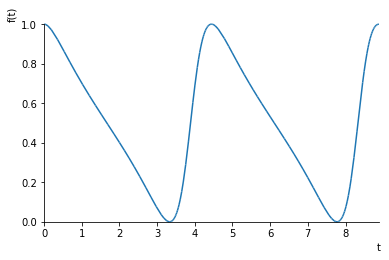

In [81]:
plot(prob_0_detect(t),(t, 0, 2*sqrt(2)*pi))

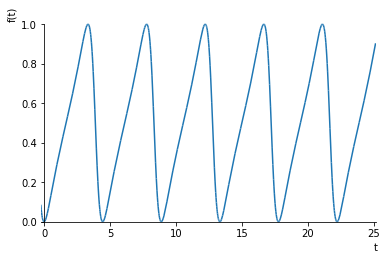

In [82]:
plot(prob_1_detect(t),(t, -0.25, 8*pi))

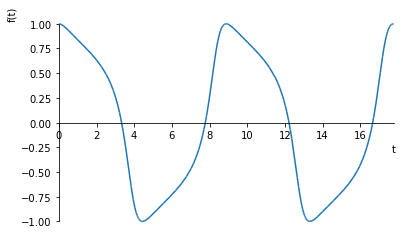

In [83]:
plot(re(non_unitary_psi(t)[0])/sqrt(lossy_norm(t)), (t, 0, 2 * 2*sqrt(2)*pi))

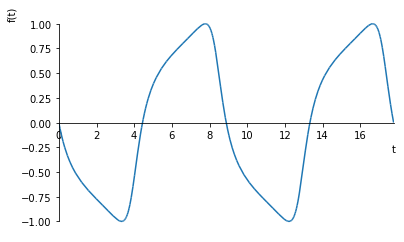

In [84]:
plot(im(non_unitary_psi(t)[1])/sqrt(lossy_norm(t)), (t, 0, 2 * 2*sqrt(2)*pi))

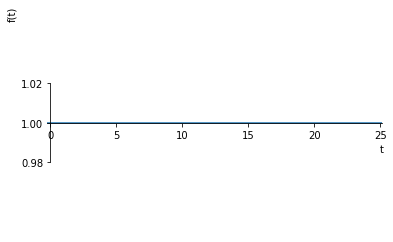

In [85]:
plot(prob_0_detect(t) + prob_1_detect(t),(t, -0.25, 8*pi))

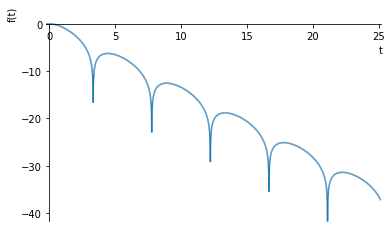

In [86]:
plot(log(abs(non_unitary_psi(t)[0]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

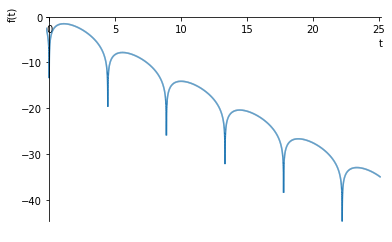

In [87]:
plot(log(abs(non_unitary_psi(t)[1]**2)), (t, -0.25, 8*pi), adaptive=False, nb_of_points=5000)

In [88]:
def prob_0_unitary(t):
    return abs(unitary_psi(t)[0]**2)

In [89]:
def prob_1_unitary(t):
    return abs(unitary_psi(t)[1]**2)

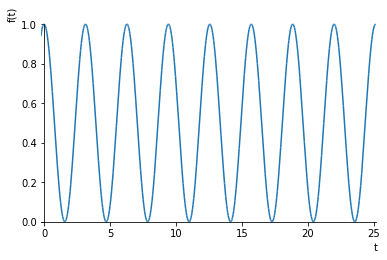

In [90]:
plot(prob_0_unitary(t),(t, -0.25, 8*pi))

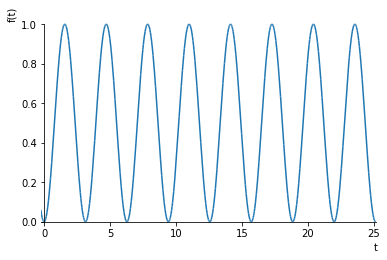

In [91]:
plot(prob_1_unitary(t),(t, -0.25, 8*pi))

In [92]:
lossy_norm_n(2)

In [93]:
X = np.linspace(1e-6, 8*np.pi, 5000)  # avoid singularity in t=0

In [94]:
Y = lossy_norm_n(X)

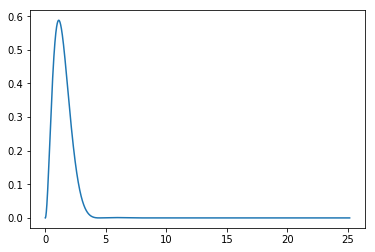

In [95]:
plt.plot(X, -np.gradient(Y, X))

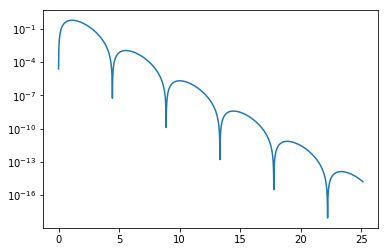

In [96]:
plt.semilogy(X, -np.gradient(Y, X))

In [97]:
# we have set gamma = 2*sqrt(2)
def hatpsi(_t):
    return \
        Heaviside(_t) * \
        2**(5/4) * \
        Matrix([
            [0, 0],
            [0, 1]
        ]) * \
        non_unitary_psi(_t)
        
        
    

In [98]:
def hatpsisquarednorm(_t):
    return abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2)

In [99]:
hatpsisquarednorm(-1)

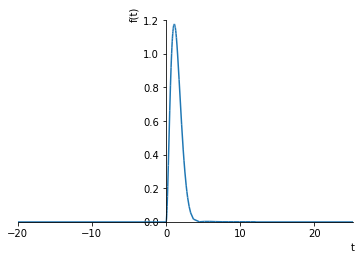

In [100]:
plot(hatpsisquarednorm(t), (t, -20, 8*pi))

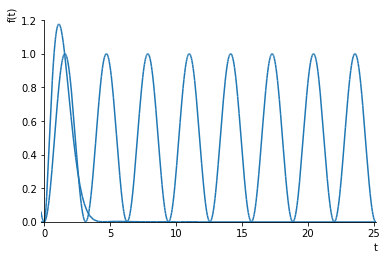

In [101]:
plot(prob_1_unitary(t), hatpsisquarednorm(t), (t, -0.25, 8*pi))

In [102]:
def prob_0_hatpsi(_t):
    return abs(hatpsi(_t)[0]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

In [103]:
def prob_1_hatpsi(_t):
    return abs(hatpsi(_t)[1]**2) / (abs(hatpsi(_t)[0]**2) + abs(hatpsi(_t)[1]**2))

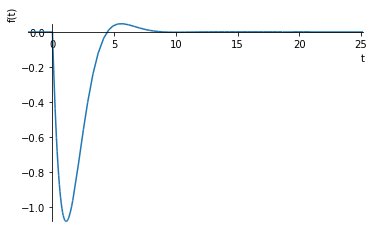

In [104]:
plot(im(hatpsi(t)[1]), (t, -2, 8*pi))

In [105]:
im(hatpsi(t)[1])

In [106]:
def fhatpsi1(_omega):
    return fourier_transform(hatpsi(t)[1], t, _omega)

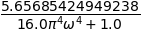

In [107]:
abs(fhatpsi1(omega))**2

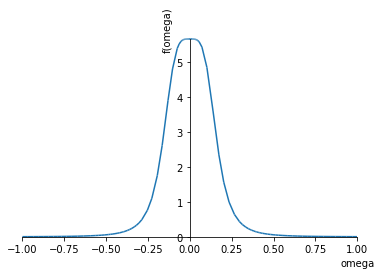

In [108]:
plot(abs(fhatpsi1(omega))**2, (omega, -1, 1))

## (Discrete) Page-Wootters model

In [134]:
from scipy.linalg import dft

In [165]:
np.arange(0,32)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [159]:
T = np.diag(np.arange(0,32)) * 2 * np.sqrt(2) * np.pi / 32

In [160]:
F = dft(32)

In [161]:
F_dagger = F.conj().T

In [164]:
Omega = F @ T @ F_dagger

In [168]:
Omega.__class__

numpy.ndarray

In [177]:
H = np.array([
    [0, 1],
    [1, 0]
])

In [178]:
D = np.array([
    [0, 0],
    [0, np.sqrt(2)]
])

In [180]:
K = H - 1j*D

In [181]:
K

array([[0.+0.j        , 1.+0.j        ],
       [1.+0.j        , 0.-1.41421356j]])

In [193]:
J = np.kron(Omega, np.eye(2)) + np.kron(np.eye(32), K)

In [195]:
eigenvalues, eigenvectors = np.linalg.eig(J)

In [196]:
eigenvalues

array([276.16584895-0.70710678j, 274.75163538-0.70710678j,
        -0.70710678-0.70710678j,   0.70710678-0.70710678j,
       267.28008307-0.70710678j, 265.86586951-0.70710678j,
         8.1786591 -0.70710678j,   9.59287266-0.70710678j,
       258.39431719-0.70710678j, 256.98010363-0.70710678j,
        17.06442497-0.70710678j,  18.47863853-0.70710678j,
       249.50855132-0.70710678j, 248.09433776-0.70710678j,
        25.95019085-0.70710678j,  27.36440441-0.70710678j,
       240.62278544-0.70710678j, 239.20857188-0.70710678j,
        34.83595672-0.70710678j,  36.25017029-0.70710678j,
       231.73701957-0.70710678j, 230.322806  -0.70710678j,
        43.7217226 -0.70710678j,  45.13593616-0.70710678j,
       222.85125369-0.70710678j, 221.43704013-0.70710678j,
        52.60748848-0.70710678j,  54.02170204-0.70710678j,
       213.96548781-0.70710678j, 212.55127425-0.70710678j,
        61.49325435-0.70710678j,  62.90746792-0.70710678j,
       205.07972194-0.70710678j, 203.66550837-0.70710678

In [197]:
eigenvectors

array([[-6.94462791e-02-1.03933702e-01j, -1.15484942e-01-4.78354290e-02j,
        -8.83883476e-02+8.83883476e-02j, ...,
         1.03933702e-01-6.94462791e-02j,  1.15484942e-01+4.78354290e-02j,
        -4.78354290e-02-1.15484942e-01j],
       [-1.22598160e-01-2.43862903e-02j,  4.78354290e-02+1.15484942e-01j,
         1.25000000e-01+4.16333634e-17j, ...,
        -1.22598160e-01-2.43862903e-02j, -4.78354290e-02-1.15484942e-01j,
        -1.15484942e-01-4.78354290e-02j],
       [-4.78354290e-02-1.15484942e-01j, -1.03933702e-01-6.94462791e-02j,
        -8.83883476e-02+8.83883476e-02j, ...,
        -1.15484942e-01+4.78354290e-02j, -8.83883476e-02-8.83883476e-02j,
         1.02834408e-14+1.25000000e-01j],
       ...,
       [-1.22598160e-01+2.43862903e-02j,  8.83883476e-02+8.83883476e-02j,
         1.25000000e-01+1.30017525e-15j, ...,
        -1.22598160e-01+2.43862903e-02j, -1.15484942e-01-4.78354290e-02j,
        -1.15484942e-01+4.78354290e-02j],
       [-8.83883476e-02-8.83883476e-02j, -1.

In [199]:
eigenvectors[0][1]

(-0.11548494156390758-0.04783542904563183j)

In [208]:
for i in range(0,64):
    print(
        np.abs(eigenvectors[i][1])**2
         )
    


0.015624999999998824
0.015624999999998421
0.01562499999999898
0.015624999999998522
0.015624999999999546
0.015624999999998768
0.015624999999999566
0.015624999999998796
0.015624999999999827
0.01562499999999908
0.015625000000000035
0.015624999999999445
0.015625000000000777
0.01562499999999949
0.015625000000001332
0.0156249999999993
0.01562500000000206
0.015624999999998855
0.01562500000000249
0.01562499999999866
0.01562500000000288
0.015624999999998515
0.01562500000000347
0.015624999999998935
0.01562500000000378
0.015624999999999032
0.015625000000004247
0.015624999999999473
0.015625000000004254
0.015624999999999455
0.015625000000004184
0.015624999999999535
0.015625000000003594
0.015624999999999015
0.01562500000000333
0.015624999999999143
0.015625000000003164
0.015624999999999164
0.015625000000002547
0.015624999999999046
0.015625000000002304
0.015624999999999039
0.015625000000001214
0.015624999999998359
0.015625000000000416
0.015624999999998085
0.015624999999999785
0.015624999999997901
0.01